In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

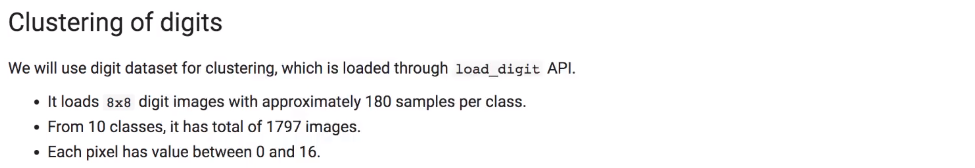

In [2]:
digits = load_digits()

In [3]:
?KMeans

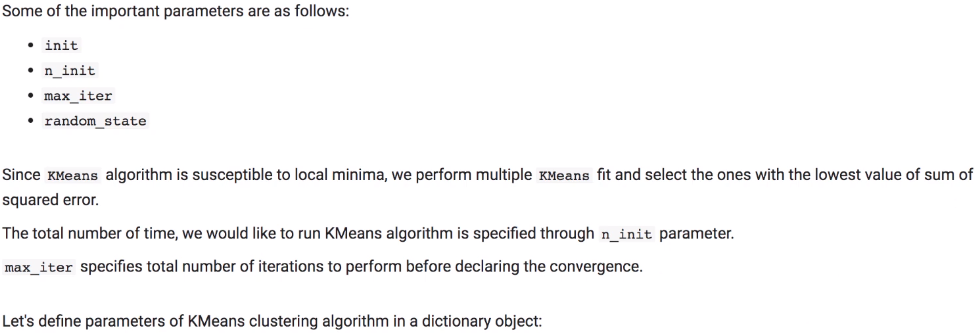

In [4]:
kmeans_kwargs = {
    'init' : 'random',
    'n_init' : 50,
    'max_iter' : 500,
    'random_state' : 0,
}

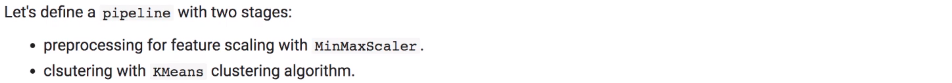

In [5]:
pipeline = Pipeline([
    ('Preprocess', MinMaxScaler()),
    ('Clustering', KMeans(n_clusters=10, **kmeans_kwargs)),
])
pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

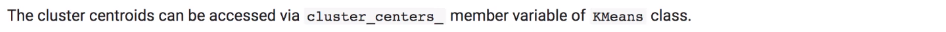

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

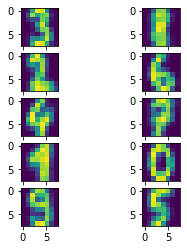

In [7]:
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10, 8, 8)):
    i.imshow(j)

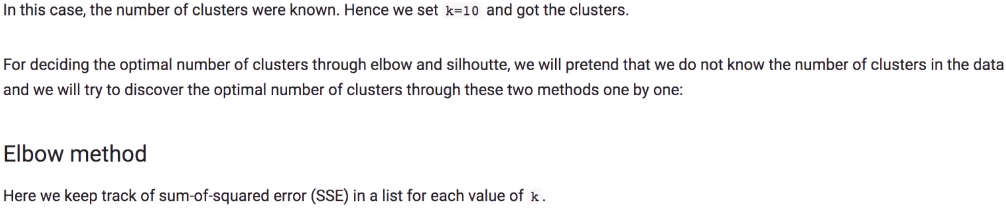

In [15]:
# Identifying the correct number of clusters. 
# Its not necessary here as we already know that there are 10 clusters
# But in a real life problem we may not know how many clusters are there

sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)

for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

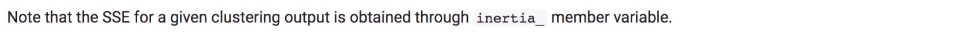

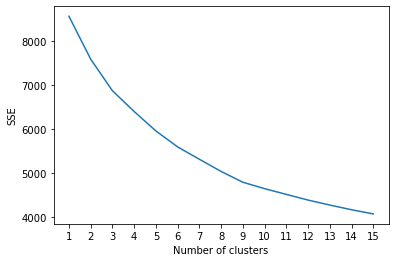

In [16]:
plt.plot(range(1, 16), sse_digit)
plt.xticks(range(1,16))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

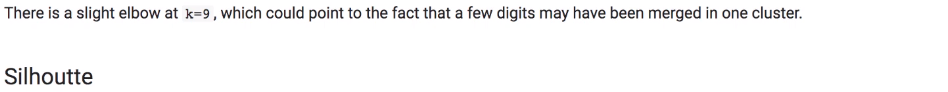

In [17]:
sil_coef_digits = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

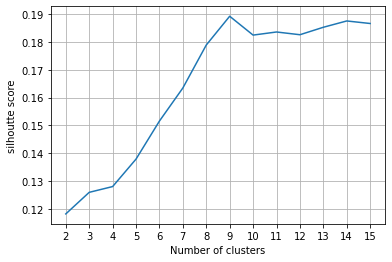

In [18]:
plt.plot(range(2, 16), sil_coef_digits)
plt.xticks(range(2,16))
plt.xlabel('Number of clusters')
plt.ylabel('silhoutte score')
plt.grid(True)
plt.show()

In [19]:
print(np.argmax(sil_coef_digits)+2)

9


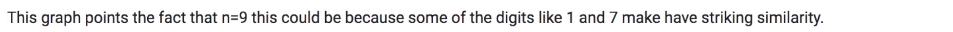